In [30]:
import warnings   # ✅ Import warnings

# Ignore sklearn "feature names" warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


In [7]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   # ✅ added import
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# -----------------------
# Step 1: Load data from SQLite
# -----------------------
conn = sqlite3.connect("students.db")
df = pd.read_sql("SELECT * FROM students", conn)
print("Data Loaded:", df.shape)
print(df.head())


Data Loaded: (1000, 11)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Attendance  Hours_Studied  Final_Score  
0          71            4.4         72.7  
1          99            9.6         82.

In [9]:
# -----------------------
# Step 2: Select Features & Target
# -----------------------
X = df[['math score', 'reading score', 'writing score', 'Attendance', 'Hours_Studied']]
y = df['Final_Score']


In [10]:
# -----------------------
# Step 3: Train-Test Split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# -----------------------
# Step 4: Train Linear Regression Model
# -----------------------
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# -----------------------
# Step 5: Predictions & Evaluation
# -----------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔹 Model Evaluation Results:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


🔹 Model Evaluation Results:
Mean Squared Error (MSE): 0.0006672332603271802
R² Score: 0.9999968879154523


In [19]:
# -----------------------
# Step 6: Model Evaluation
# -----------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on test set
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Model Evaluation Metrics:")
print(f"R² Score       : {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


📊 Model Evaluation Metrics:
R² Score       : 1.0000
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.03


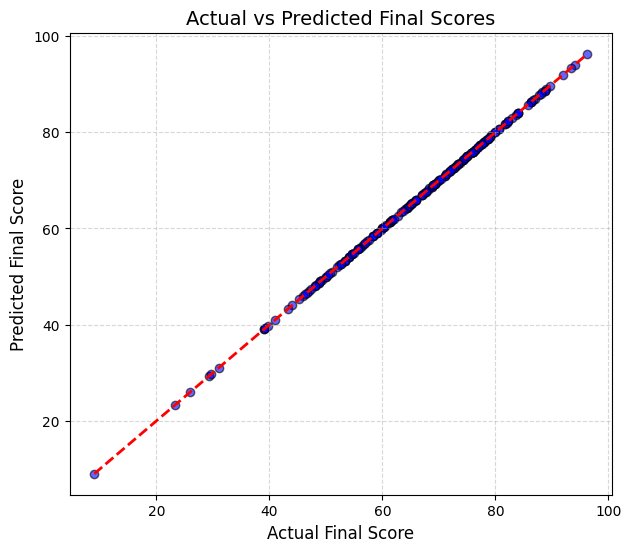

In [20]:
# -----------------------
# Step 7: Visualization of Predictions
# -----------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2)  # Ideal line
plt.xlabel("Actual Final Score", fontsize=12)
plt.ylabel("Predicted Final Score", fontsize=12)
plt.title("Actual vs Predicted Final Scores", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


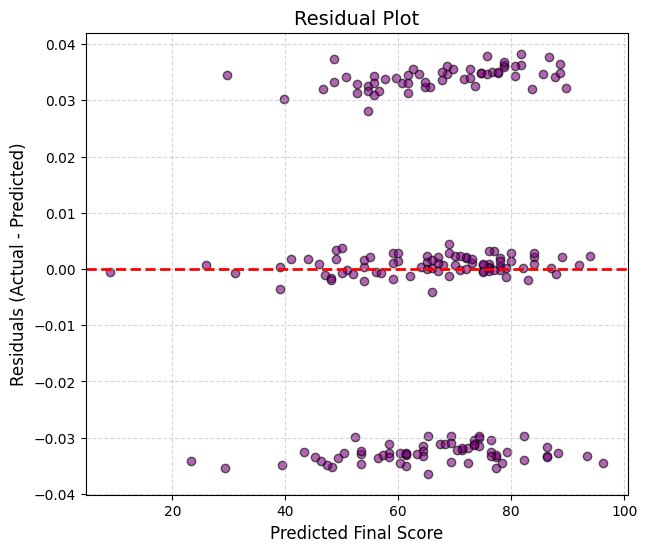

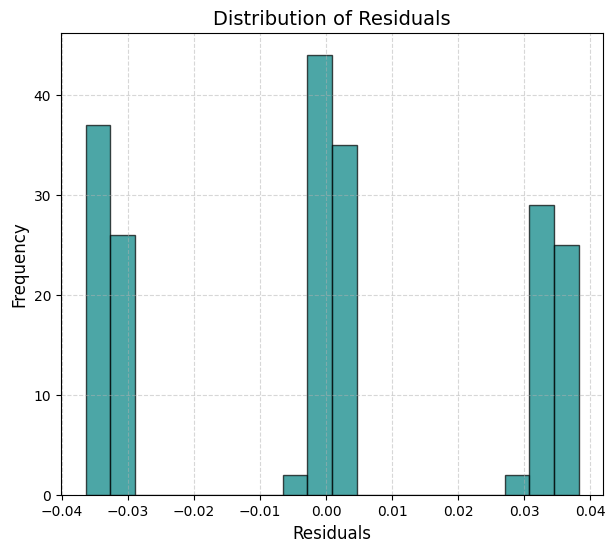

In [22]:
# -----------------------
# Step 8: Residual Analysis
# -----------------------
residuals = y_test - y_pred

# (a) Residual Plot
plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Final Score", fontsize=12)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12)
plt.title("Residual Plot", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# (b) Residual Histogram
plt.figure(figsize=(7,6))
plt.hist(residuals, bins=20, color='teal', edgecolor='black', alpha=0.7)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Residuals", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()




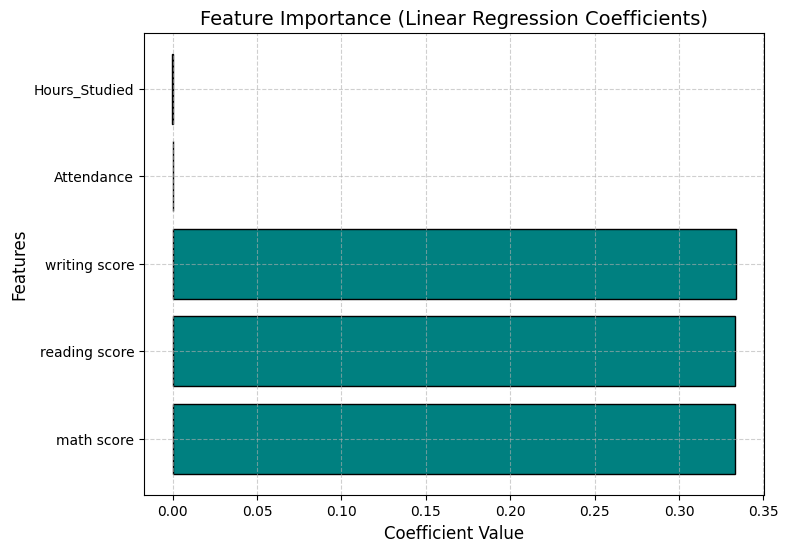

math score: 0.33
reading score: 0.33
writing score: 0.33
Attendance: -0.00
Hours_Studied: -0.00


In [17]:
# -----------------------
# Step 9: Feature Importance (Coefficients)
# -----------------------
import numpy as np

# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a bar plot
plt.figure(figsize=(8,6))
plt.barh(feature_names, coefficients, color='teal', edgecolor="black")
plt.title("Feature Importance (Linear Regression Coefficients)", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Print values for clarity
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")


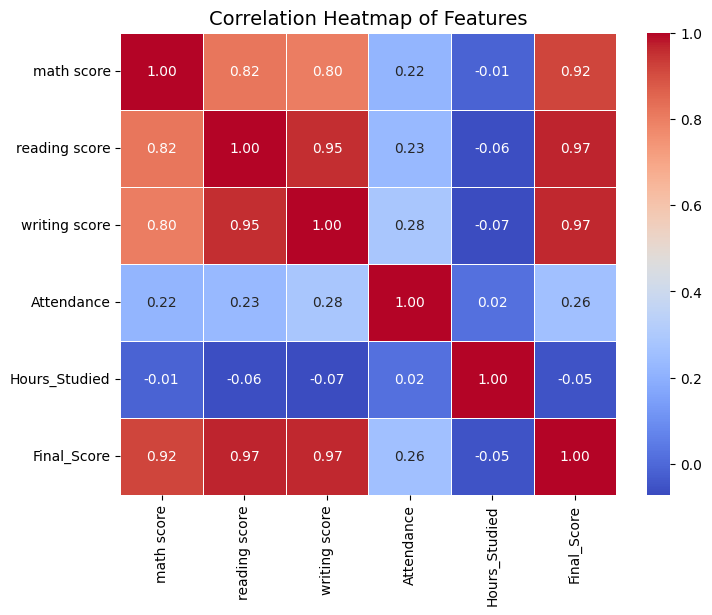

In [18]:
# -----------------------
# Step 10: Correlation Heatmap
# -----------------------
import seaborn as sns

# Compute correlation matrix
corr = df[['math score', 'reading score', 'writing score', 'Attendance', 'Hours_Studied', 'Final_Score']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()



In [26]:
!pip install statsmodels

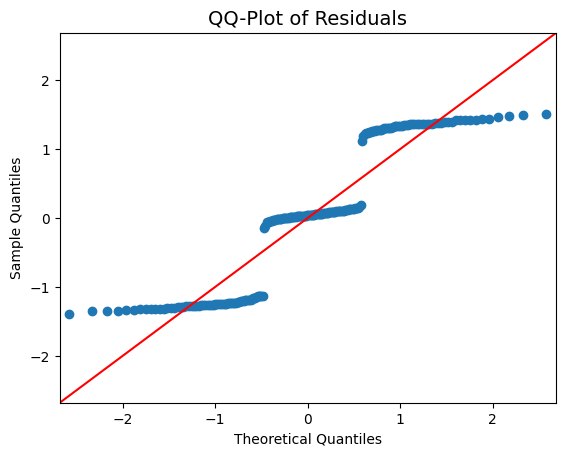

In [27]:
import scipy.stats as stats
import statsmodels.api as sm

# (c) QQ-Plot for Residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ-Plot of Residuals", fontsize=14)
plt.show()


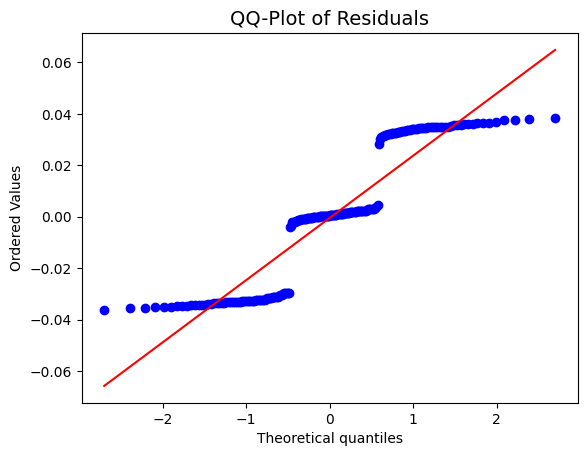

In [28]:
import scipy.stats as stats

# (c) QQ-Plot for Residuals without statsmodels
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals", fontsize=14)
plt.show()


In [31]:
import joblib

# Save the trained model
joblib.dump(model, "final_score_model.pkl")

# Later (or in Streamlit), load it like this:
loaded_model = joblib.load("final_score_model.pkl")

# Quick test to confirm
sample_input = [[78, 85, 80, 90, 4.5]]  # same as before
pred = loaded_model.predict(sample_input)
print("Predicted Final Score (loaded model):", pred[0])


Predicted Final Score (loaded model): 80.99702735554905


In [8]:
!pip install joblib


In [9]:
!pip install scikit-learn


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

# Load dataset
data = pd.read_csv(r"C:\Users\shrey\Students_Score_Prediction\data\Students Performance.csv")

# Features & target
X = data[["Hours_Studied"]]     # independent variable
y = data["Final_Score"]         # dependent variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "final_score_model.pkl")
print("✅ Model trained and saved as final_score_model.pkl")



✅ Model trained and saved as final_score_model.pkl


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Load dataset
df = pd.read_csv(r"C:\Users\shrey\Students_Score_Prediction\data\Students Performance.csv")

# Features & target
X = df[['Attendance', 'Hours_Studied']]
y = df['Final_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, r"C:\Users\shrey\Students_Score_Prediction\final_score_model.pkl")
print("✅ Model trained and saved!")

# Predict on test set to calculate error metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")



✅ Model trained and saved!
MSE: 215.36, MAE: 11.56, R2: -0.00
